In [1]:
import pandas as pd
import numpy as np
file="SAPIRSAPR.xlsx"
df=pd.read_excel(file)

In [2]:
# define all relevnt data
all_court=[x for x in df.columns if x.startswith('R') ]
features=['n3','n24','n48','n72','n96','n130','n154','n178','ln3','ln24','ln48','ln72','ln96','ln130','ln154','ln178','p3','p24','p48','p72','p96','p130','p154','p178','lp3','lp24','lp48','lp72','lp96','lp130','lp154','lp178','D3','d24','d48','d72','d96','d130','d154','d178','ld3','ld24','ld48','ld72','ld96','ld130','ld154','ld178','or3','or24','or48','or72','or96','or130','or154','or178','lor3','lor24','lor48','lor72','lor96','lor130','lor154','lor178','v3','v24','v48','v72','v96','v130','v154','v178','lv3','lv24','lv48','lv72','lv96','lv130','lv154','lv178','s3','s24','s48','s72','s96','s130','s154','s178','ls3','ls24','ls48','ls72','ls96','ls130','ls154','ls178']
cards=['מצהובים','מאדומים','אצהובים','אאדומים']
meta_data=['אורחת','מארחת','date1']


In [3]:
#taking just what relevnt
relevnt=df[meta_data+features+all_court+cards]

In [4]:
relevnt[all_court]=relevnt[all_court].astype(float)

c:\python\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [5]:
def list_contin_in_range(ls,low,upp):
    for x in ls:
        if (x <=upp and x>=low):
            return True
    return False

In [6]:
# building the labels

In [7]:
relevnt.loc[:,'yellow_count']=relevnt[['אצהובים','מצהובים']].astype(float).sum(axis=1)
relevnt.loc[:,'red_count']=relevnt[['אאדומים','מאדומים']].astype(float).sum(axis=1)
relevnt.drop(columns=cards,inplace=True)

c:\python\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
c:\python\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
c:\python\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=er

In [8]:
y_player=pd.DataFrame()
y_player['court']=relevnt[all_court].apply(list,axis=1).apply(lambda x:3.0 if list_contin_in_range(x,21,26) else 0.0)
y_player['yellow']=relevnt['yellow_count'].apply(lambda x:1.0 if x>1 else 0.0)
y_player['red']=relevnt['red_count'].apply(lambda x:2.0 if x>1 else 0.0)
relevnt['player_y']=y_player.max(axis=1)

c:\python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [9]:
y_fan=pd.DataFrame()
y_fan['type_1']=relevnt[all_court].apply(list,axis=1).apply(lambda x:1.0 if list_contin_in_range(x,31,35) else 0.0)
y_fan['type_2']=relevnt[all_court].apply(list,axis=1).apply(lambda x:2.0 if list_contin_in_range(x,51,58) else 0.0)
relevnt.loc[:,'fan_y']=y_fan.max(axis=1).copy()


c:\python\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
c:\python\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
def join_label_creator(x):
    if x[0]>=1 or x[1]>=2:
        return 2.0
    elif x[1]==1.0:
        return 1.0
    else:
        return 0.0

relevnt['joind_y']=relevnt[['fan_y','player_y']].apply(join_label_creator,axis=1)

c:\python\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [11]:
relevnt.drop(columns=all_court+['yellow_count','red_count'],inplace=True)

c:\python\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [12]:
contin_null=relevnt.loc[relevnt.isnull().any(axis=1),relevnt.loc[:,relevnt.isnull().any(axis=0)].columns.tolist()+meta_data]
contin_null.to_csv(encoding='utf-8',path_or_buf='new_cover_contain_null.csv')

In [13]:
#import nbimporter
from MyTools import remove_all_null
new_relevnt,removed=remove_all_null(relevnt)

Number of smaples that was removed becuse they contain 'NaN' =36


In [14]:
from MyTools import build_scale,sacle
X=new_relevnt[features]
joind_y=new_relevnt['joind_y']
fan_y=new_relevnt['fan_y']
player_y=new_relevnt['player_y']

# regression

In [15]:
from MyTools import classification_estimation
from MyTools import input_regression_estimation
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import svm

In [16]:
clfs=[('svm',svm.SVR(kernel='rbf')),
      ('radom_forest',RandomForestRegressor(max_depth=10, random_state=0)),
     ('nn',MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(15, 10), random_state=1))]

---------- regression---------
svm - avg score with normal rmse = 0.28939314084274803
radom_forest - avg score with normal rmse = 0.5969120694230657
nn - avg score with normal rmse = 3.515029586323235
------------------------------


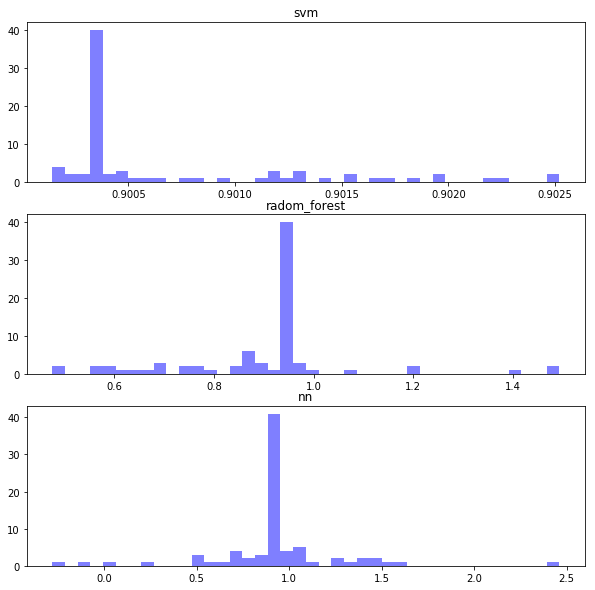

In [17]:
input_regression_estimation(clfs,X.values,player_y.values,0.33)

---------- regression---------
svm - avg score with normal rmse = 0.11407729745420081
radom_forest - avg score with normal rmse = 0.14550748495781218
nn - avg score with normal rmse = 1.8217086389567847
------------------------------


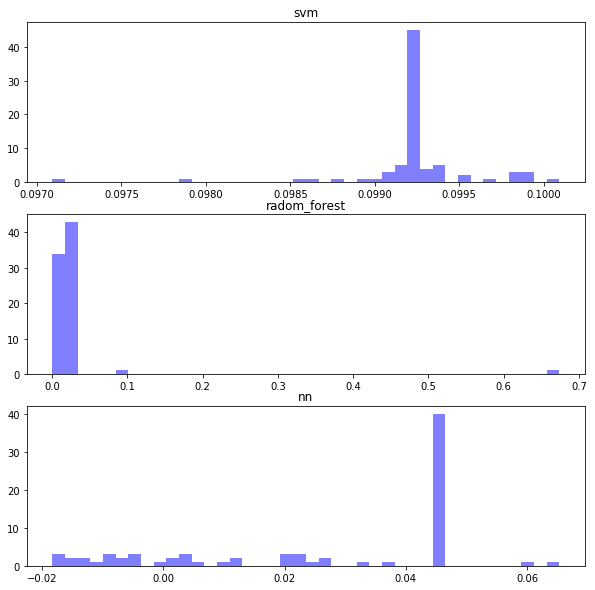

In [18]:
input_regression_estimation(clfs,X.values,fan_y.values,0.33)

---------- regression---------
svm - avg score with normal rmse = 0.2524939763922165
radom_forest - avg score with normal rmse = 0.30301699964299755
nn - avg score with normal rmse = 7.575422293191688
------------------------------


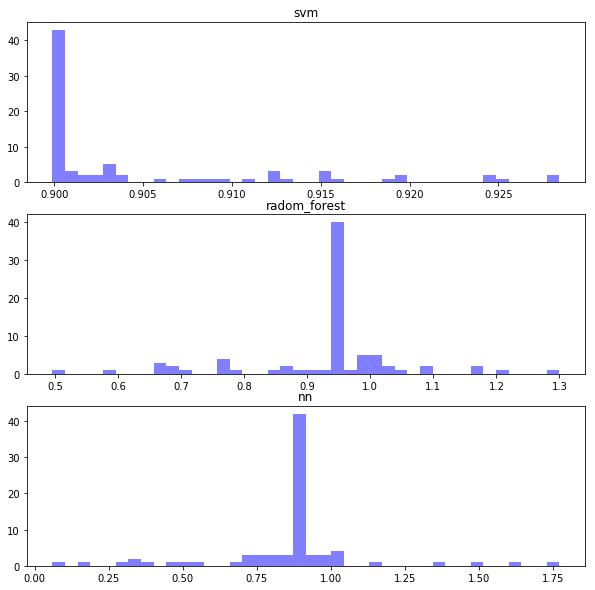

In [19]:
input_regression_estimation(clfs,X.values,joind_y.values,0.33)


# classification

In [20]:
from MyTools import input_classification_estimation
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

clfs=[('svm_ovo',svm.SVC(decision_function_shape='ovo',class_weight='balanced')),
      ('svm_ovr',svm.SVC(decision_function_shape='ovr',class_weight='balanced')),
      ('radom_forest',RandomForestClassifier(max_depth=10, random_state=0)),
     ('nn',MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(10,10, 10,10), random_state=1))]


----------classification------
svm_ovo - mean accuracy is= 0.15037593984962405
svm_ovo - avg auc score is= 6.7
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
svm_ovr - mean accuracy is= 0.13233082706766916
svm_ovr - avg auc score is= 6.9
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
radom_forest - mean accuracy is= 0.5157894736842106
radom_forest - avg auc score is= 4.2
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
nn - mean accuracy is= 0.4270676691729324
nn - avg auc score is= 3.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
------------------------------


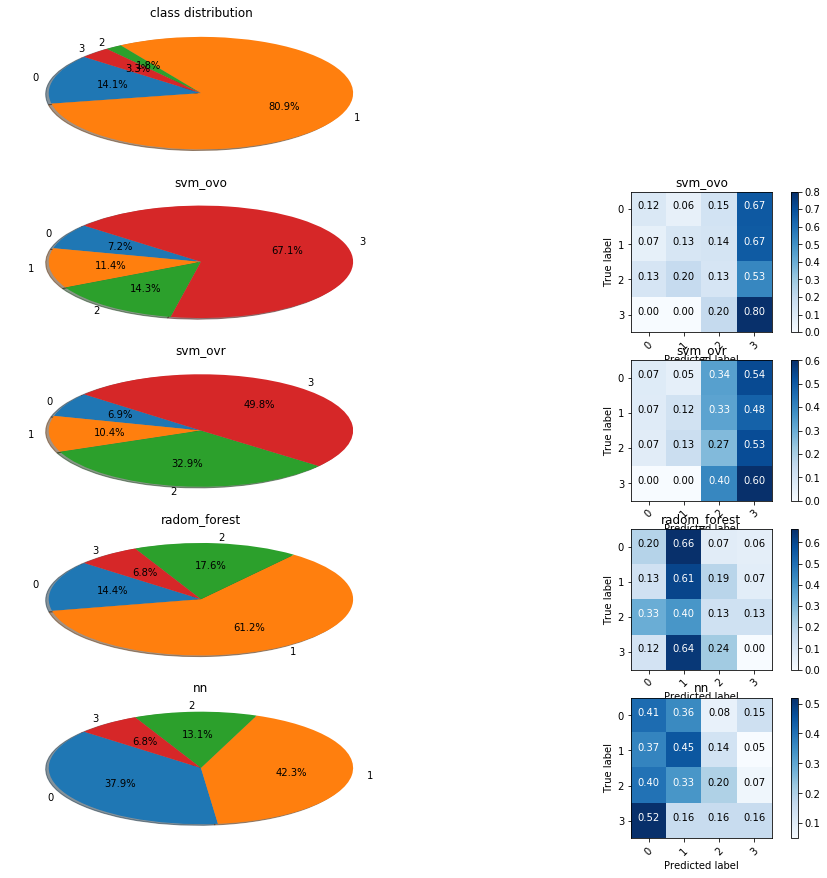

In [21]:
input_classification_estimation(clfs,X.values, player_y.values,0.33)


----------classification------
svm_ovo - mean accuracy is= 0.5563909774436089
svm_ovo - avg auc score is= 0.8
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
svm_ovr - mean accuracy is= 0.40601503759398494
svm_ovr - avg auc score is= 1.1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
radom_forest - mean accuracy is= 0.8481203007518797
radom_forest - avg auc score is= 0.1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
nn - mean accuracy is= 0.6270676691729324
nn - avg auc score is= 0.7
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
------------------------------


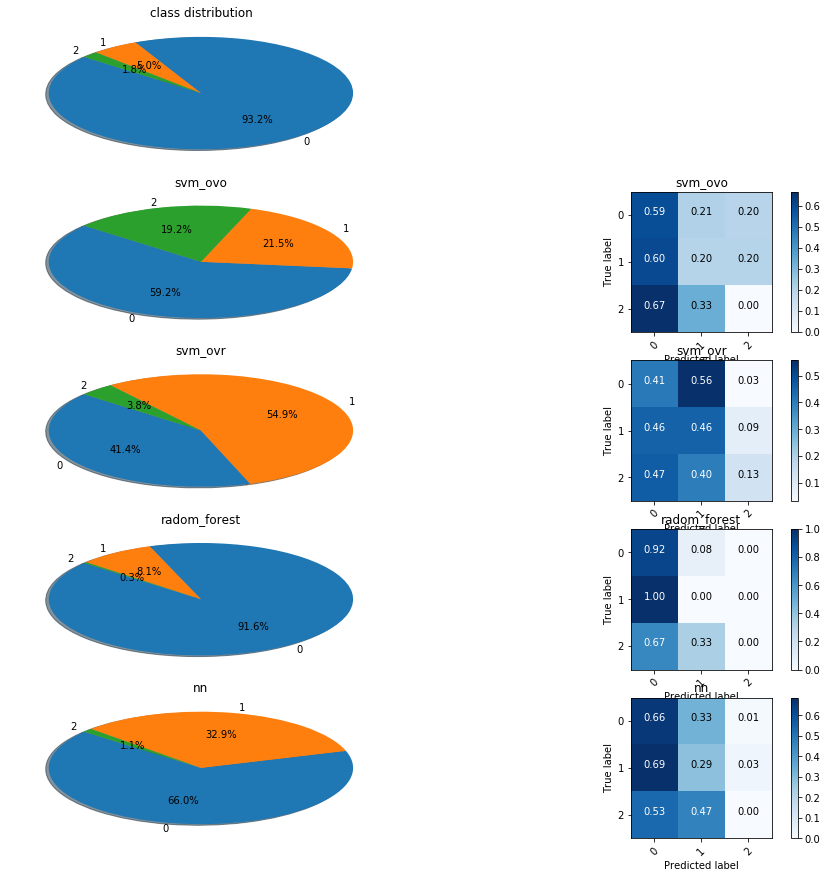

In [22]:
input_classification_estimation(clfs,X.values, fan_y.values,0.33)



----------classification------
svm_ovo - mean accuracy is= 0.15606060606060607
svm_ovo - avg auc score is= 0.5
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
svm_ovr - mean accuracy is= 0.18333333333333332
svm_ovr - avg auc score is= 0.3
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
radom_forest - mean accuracy is= 0.6151515151515151
radom_forest - avg auc score is= 2.0
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
nn - mean accuracy is= 0.36818181818181817
nn - avg auc score is= 1.3
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
------------------------------


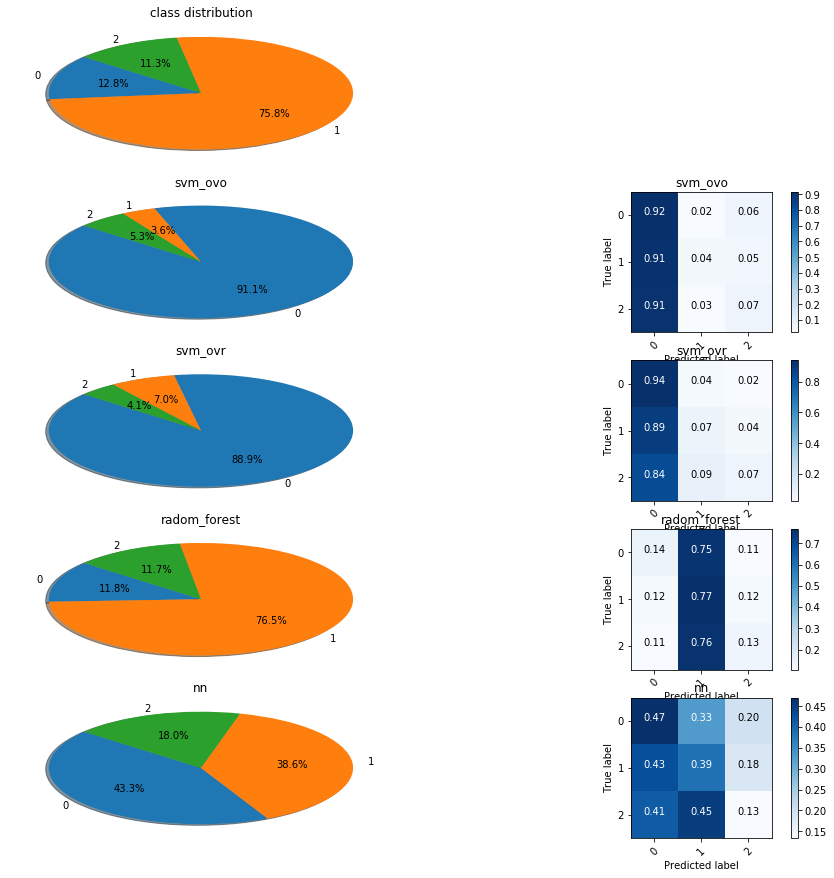

In [23]:
input_classification_estimation(clfs,X.values, joind_y.values,0.33)


# regression with classification measurments


---------- regression with classification output---------
class size= {0: 56, 1: 321, 2: 7, 3: 13}
svr with rbf - avg score with round the closest = 0.7690494166331249
svr with rbf - avg score with ceil  = 0.8765608405743534
svr with rbf - avg score with floor = 0.9375503225744206
svr with rbf - avg score with floor = 0.9375503225744206


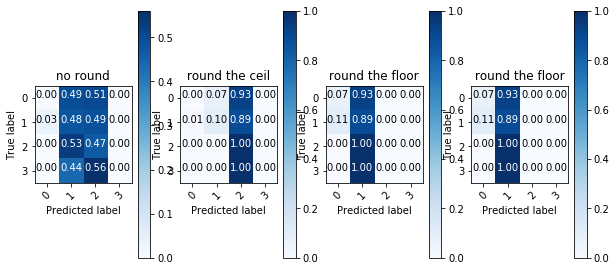

In [24]:
from MyTools import regression_projected_classification_estimation
regression_projected_classification_estimation(X.values, player_y.values,0.33)

---------- regression with classification output---------
class size= {0: 370, 1: 20, 2: 7}
svr with rbf - avg score with round the closest = 0.7893050424855079
svr with rbf - avg score with ceil  = 0.8173123261799301
svr with rbf - avg score with floor = 0.8006610700072574
svr with rbf - avg score with floor = 0.8006610700072574


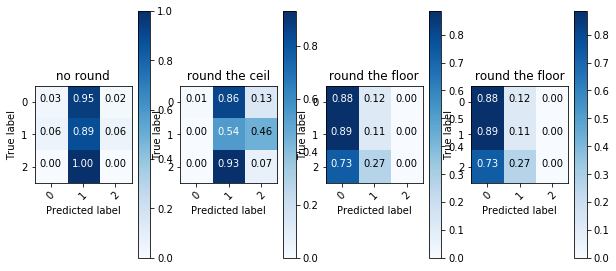

In [25]:
regression_projected_classification_estimation(X.values, fan_y.values,0.33)

---------- regression with classification output---------
class size= {0: 51, 1: 301, 2: 45}
svr with rbf - avg score with round the closest = 0.25101687841360476
svr with rbf - avg score with ceil  = 0.26408471799052624
svr with rbf - avg score with floor = 0.26242158945823013
svr with rbf - avg score with floor = 0.26242158945823013


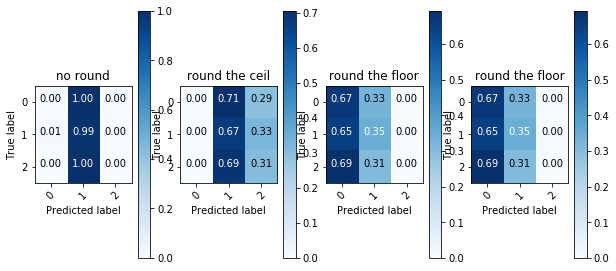

In [26]:
regression_projected_classification_estimation(X.values,joind_y.values,0.33)